<a href="https://colab.research.google.com/github/Darktechie-programmer/Deep_learning/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Keras :
         * Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

#### Tensorflow :
    * TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

### Artificial Neural Network

In [0]:
# part 1 - Data Preprocessing

In [0]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
# Importing the dataset
dataset = pd.read_csv("sample_data/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,-1]

In [35]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [0]:
# Create Dummy variables...
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True) # drop_first : it drop first dummy for multicoleanerity reason.... 

In [37]:
# Concatenate the Data Frames
X = pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [0]:
# Drop Unnecessary columns
X = X.drop(columns=['Geography','Gender'],axis=1)

In [39]:
X.head()
# X.columns

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [0]:
# Spliting dataset into traing set to testing set....
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# part 2 - Now let's make ANN

In [0]:
# Importing the keras libraries and packages..
import keras
from keras.models import Sequential  # most use...
from keras.layers import Dense   # for creating hidden layers use it..
# from keras.layers import LeakyReLU,PReLU,ELU 
from keras.layers import Dropout  # dropout is used when the deep neural network

In [0]:
# Initialising the ANN
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer..
classifier.add(Dense(units=6, kernel_initializer="he_uniform",activation='relu',input_dim=11))
# whenever use the kernel_initializer by he_uniform or he_normal that time use relu.. and vice-varsa
classifier.add(Dropout(0.3))

In [0]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation='relu'))
classifier.add(Dropout(0.3))

  * Always remember hidden layer are relu activation and the kernel_initializer are he_uni. or he_nor.....ok

In [0]:
# Adding the third hidden layer
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation='relu'))
classifier.add(Dropout(0.3))

In [0]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation='sigmoid'))

In [0]:
# compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# note: we have multiple optimizer but adam is most use and batter one....
# note: whenever the output in the 0 and 1 then that time use loss in binary_crossentropy...
# note: whenever the output in the multiple category then use loss in categorical_crossentropy...

In [66]:
classifier.summary() # get the summary

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [67]:
# Fitting the ANN to the Training set 
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, nb_epoch=100)
#note: batch_size is 10 so the ram load size is low so not affect to the system RAM and easily exected....

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 221us/step - loss: 0.6285 - accuracy: 0.7882 - val_loss: 0.5271 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 175us/step - loss: 0.5440 - accuracy: 0.7960 - val_loss: 0.5051 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 173us/step - loss: 0.5154 - accuracy: 0.7960 - val_loss: 0.4947 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 178us/step - loss: 0.5089 - accuracy: 0.7962 - val_loss: 0.4908 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 179us/step - loss: 0.4982 - accuracy: 0.7962 - val_loss: 0.4875 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 179us/step - loss: 0.4929 - accuracy: 0.7962 - val_loss: 0.4779 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 172us/step

In [52]:
# List all data in history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


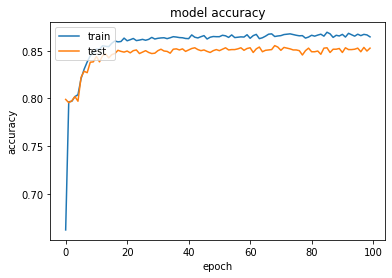

In [54]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

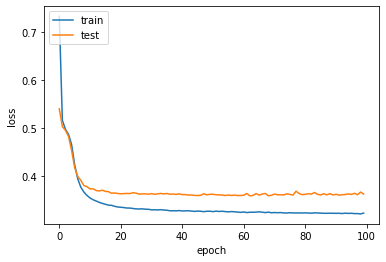

In [55]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [0]:
# part 3 - Making the predictions and evaluating the midel

In [68]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [69]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1571,   24],
       [ 291,  114]])

In [71]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8425